In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the wine dataset
wine_data = pd.read_csv('wine-clustering.csv') 

# Check for missing values
print(wine_data.isnull().sum())  # Check if there are any missing values

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64


In [16]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Extract the desired columns for clustering
columns_for_clustering = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
                          'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
                          'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
features = wine_data[columns_for_clustering]

In [17]:
# Prepare the data for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [18]:
# Perform agglomerative hierarchical clustering
clustering = AgglomerativeClustering(n_clusters=3)  # Specify the number of clusters
cluster_labels = clustering.fit_predict(scaled_features)

In [19]:
# Add cluster labels to the dataset
wine_data['cluster_label'] = cluster_labels

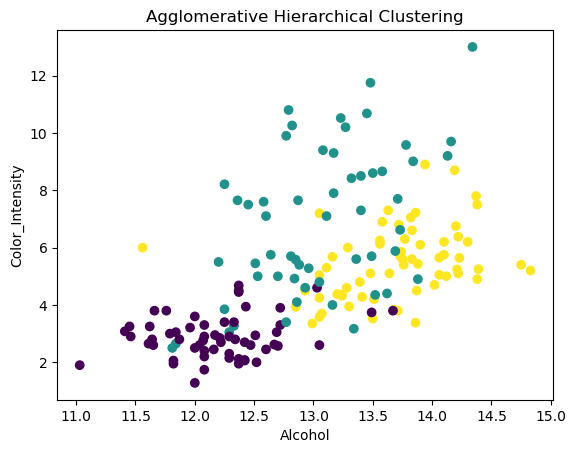

In [20]:
# Visualize the clusters
plt.scatter(features['Alcohol'], features['Color_Intensity'], c=cluster_labels)
plt.xlabel('Alcohol')
plt.ylabel('Color_Intensity')
plt.title('Agglomerative Hierarchical Clustering')
plt.show()

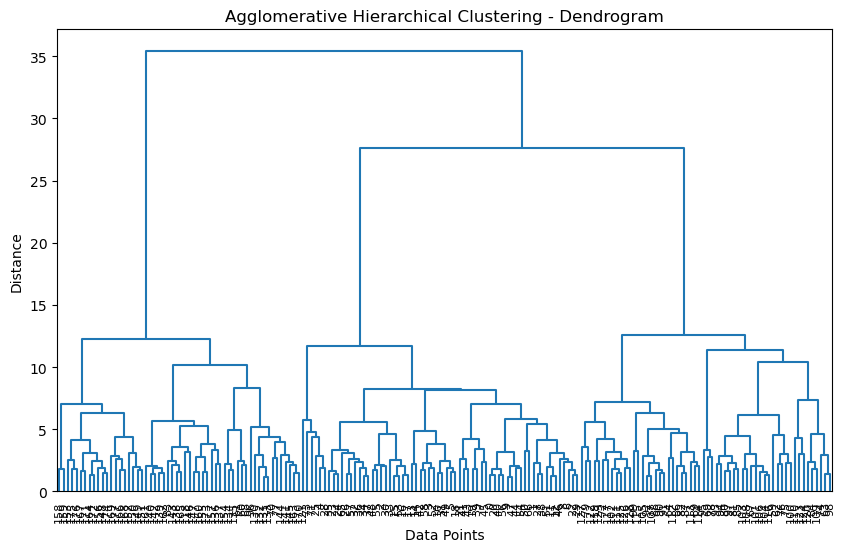

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Calculate the linkage matrix
linkage_matrix = linkage(scaled_features, method='ward')  # Adjust the method if desired

# Generate and plot the dendrogram
plt.figure(figsize=(10, 6))
plt.title('Agglomerative Hierarchical Clustering - Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
dendrogram(linkage_matrix, leaf_font_size=8, color_threshold=0)
plt.show()